In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../src/utility/")
from utility import plot_settings
from utility import visualization
from utility import data_base as data

In [3]:
df_raw = data.read_csv('../data/cc_institution_grads.csv')
print(f'Raw data file: {len(df_raw)}')
df_drop_na = df_raw.dropna()
print(f"rows after droppped Nan: {len(df_drop_na)}")
df = df_drop_na.copy()

Raw data file: 1302102
rows after droppped Nan: 332061


### Institution info

In [4]:
df_institution = pd.read_csv('../data/cc_institution_details.csv', encoding = "ISO-8859-1")
df_institution.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


### Comapre the raw data vs clean data

In [5]:
df_raw.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


In [6]:
df.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
18,100760,2012,B,X,2y all,594.0,40.0,87.0,6.7,14.6
36,100760,2013,B,X,2y all,594.0,46.0,54.0,7.7,9.1
54,101028,2011,B,X,2y all,261.0,25.0,42.0,9.6,16.1
72,101028,2012,B,X,2y all,281.0,41.0,41.0,14.6,14.6


### Shortcut descriptions

In [7]:
# Descriptions for the different shortcuts

"""
cohort
-----------
degree-seeking cohort type 
    ('4y bach' = Bachelor's/equivalent-seeking cohort at 4-year institutions; 
    '4y other' = Students seeking another type of degree or certificate at a 4-year institution; 
    '2y all' = Degree-seeking students at 2-year institutions)

race/ethnicity of students 
    ('X' = all students; 
    'Ai' = American Indian; 
    'A' = Asian; 
    'B' = Black; 
    'H' = Hispanic; 
    'W' = White)
"""

"""
grad_100: finnishing in timeframe of the programme
grad_100_rate: same as above in procent

grad_150: 1.5x time study speed
grad_150_rate: same as above in procent

grad_cohort: 
    Number of first-time, 
    full-time, 
    degree-seeking students in the cohort being tracked, 
    minus any exclusions
"""


'\ngrad_100: finnishing in timeframe of the programme\ngrad_100_rate: same as above in procent\n\ngrad_150: 1.5x time study speed\ngrad_150_rate: same as above in procent\n\ngrad_cohort: \n    Number of first-time, \n    full-time, \n    degree-seeking students in the cohort being tracked, \n    minus any exclusions\n'

### Find unique values

In [8]:
print(df['year'].unique())
print(df['gender'].unique())
print(df['race'].unique())
print(df['cohort'].unique())

[2011 2012 2013 2010 2009 2008 2007 2006 2005 2004 2003 2002]
['B' 'M' 'F']
['X' 'W' 'B' 'H' 'Ai' 'A']
['2y all' '4y bach' '4y other']


In [9]:
df_clean = df[['unitid', 'year', 'gender', 'race', 'grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].copy()
df_clean_f = df_clean[df_clean['gender'] == 'F']
df_clean_m = df_clean[df_clean['gender'] == 'M']

In [10]:
df_2002 = df_clean[df_clean['year'] == 2002]
df_2003 = df_clean[df_clean['year'] == 2003]
df_2004 = df_clean[df_clean['year'] == 2004]
df_2005 = df_clean[df_clean['year'] == 2005]
df_2006 = df_clean[df_clean['year'] == 2006]
df_2007 = df_clean[df_clean['year'] == 2007]
df_2008 = df_clean[df_clean['year'] == 2008]
df_2009 = df_clean[df_clean['year'] == 2009]
df_2010 = df_clean[df_clean['year'] == 2010]
df_2011 = df_clean[df_clean['year'] == 2011]
df_2012 = df_clean[df_clean['year'] == 2012]
df_2013 = df_clean[df_clean['year'] == 2013]

In [11]:
df_2011

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,73.0,105.0,16.4,23.5
54,101028,2011,B,X,25.0,42.0,9.6,16.1
108,101143,2011,B,X,126.0,174.0,27.3,37.7
162,101161,2011,B,X,118.0,129.0,13.6,14.9
216,101240,2011,B,X,156.0,228.0,11.9,17.4
...,...,...,...,...,...,...,...,...
331356,475291,2011,B,Ai,0.0,0.0,0.0,0.0
331357,475291,2011,M,Ai,0.0,0.0,0.0,0.0
331359,475291,2011,B,A,0.0,0.0,0.0,0.0
331360,475291,2011,M,A,0.0,0.0,0.0,0.0


In [12]:
df_2011_m = df_2011[df_2011['gender'] == 'M']
df_2011_m

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205093,100654,2011,M,X,27.0,130.0,5.2,25.2
205096,100654,2011,M,W,1.0,1.0,14.3,14.3
205099,100654,2011,M,B,25.0,127.0,5.0,25.4
205102,100654,2011,M,H,0.0,1.0,0.0,33.3
205105,100654,2011,M,Ai,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
331348,475291,2011,M,W,2.0,3.0,25.0,37.5
331351,475291,2011,M,B,1.0,1.0,20.0,20.0
331354,475291,2011,M,H,0.0,0.0,0.0,0.0
331357,475291,2011,M,Ai,0.0,0.0,0.0,0.0


In [13]:
df_2011_f = df_2011[df_2011['gender'] == 'F']
df_2011_f

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205094,100654,2011,F,X,89.0,215.0,15.6,37.6
205097,100654,2011,F,W,0.0,2.0,0.0,33.3
205100,100654,2011,F,B,88.0,209.0,15.8,37.5
205103,100654,2011,F,H,0.0,1.0,0.0,33.3
205106,100654,2011,F,Ai,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
331298,466921,2011,F,B,1.0,1.0,50.0,50.0
331346,475291,2011,F,X,2.0,2.0,40.0,40.0
331349,475291,2011,F,W,2.0,2.0,66.7,66.7
331352,475291,2011,F,B,0.0,0.0,0.0,0.0


---

## Plotting data

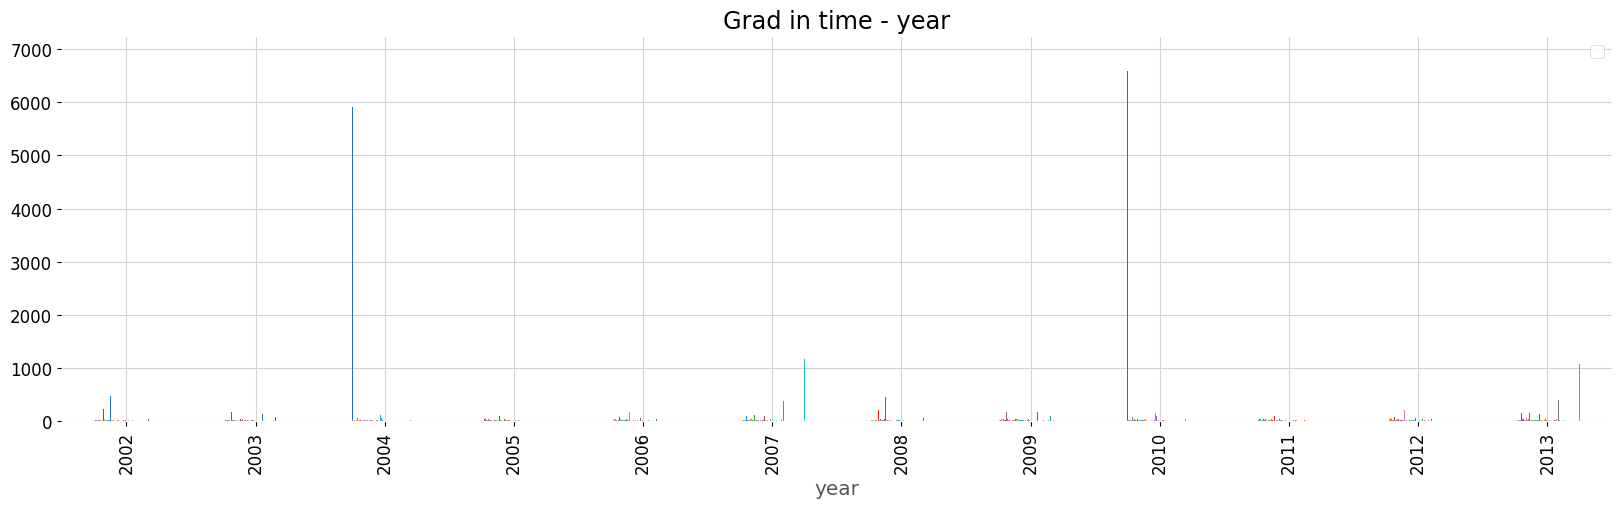

In [15]:
fig, ax = plt.subplots()
col = df_clean['grad_100_rate']
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='Grad in time - year', ax=ax)
ax.legend([])

### Education with 100 and 150 finnishing rate

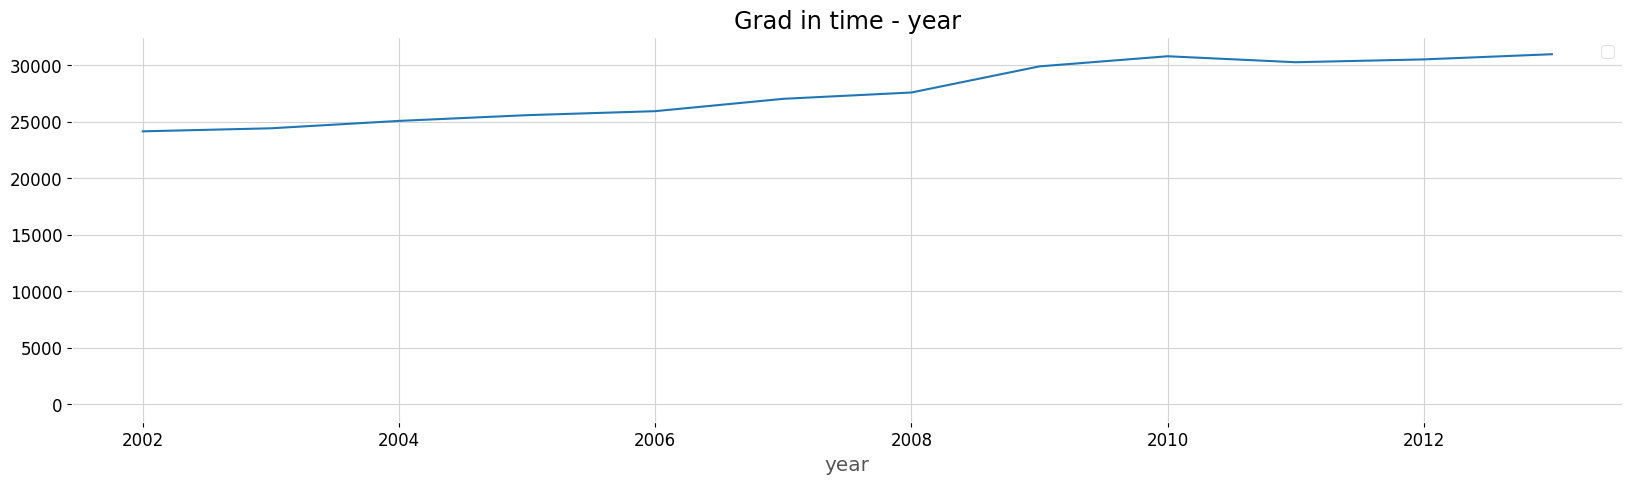

In [ ]:
fig, ax = plt.subplots()
col = df_clean['grad_100'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='line', title='Grad in time - year', ax=ax)
ax.legend([])

In [ ]:
fig, ax = plt.subplots()
col = df_clean['grad_100']
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='Grad in time - year', ax=ax)
ax.legend([])

NameError: name 'plt' is not defined

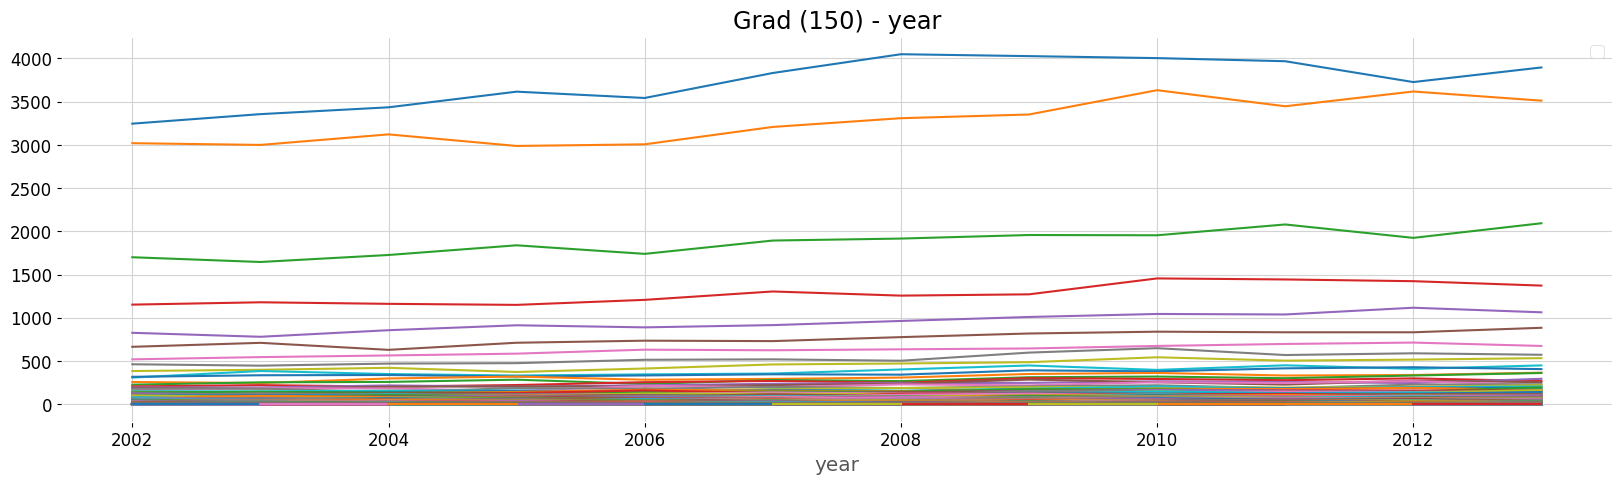

In [ ]:
fig, ax = plt.subplots()
col = df_clean['grad_150']
df_clean.groupby(['year', col]).size().unstack().plot(kind='line', title='Grad (150) - year', ax=ax)
ax.legend([])

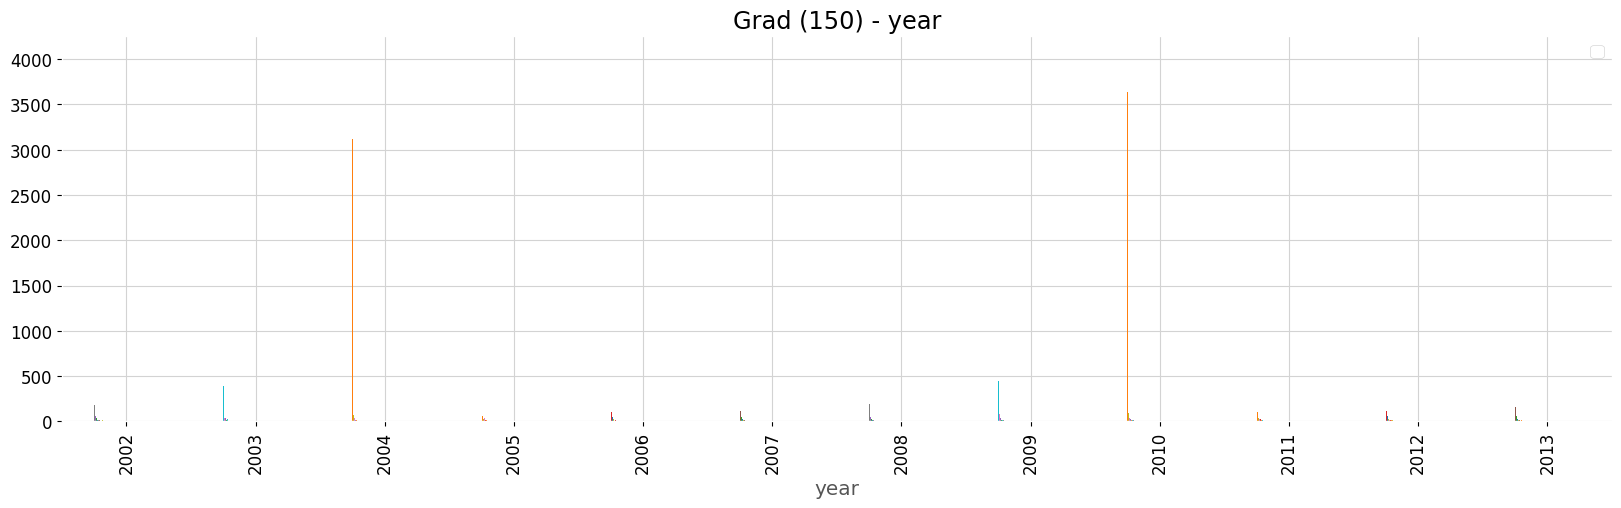

In [ ]:
fig, ax = plt.subplots()
col = df_clean['grad_150']
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='Grad (150) - year', ax=ax)
ax.legend([])

### Gender and race distribution

<AxesSubplot:title={'center':'Race distribution'}, xlabel='gender'>

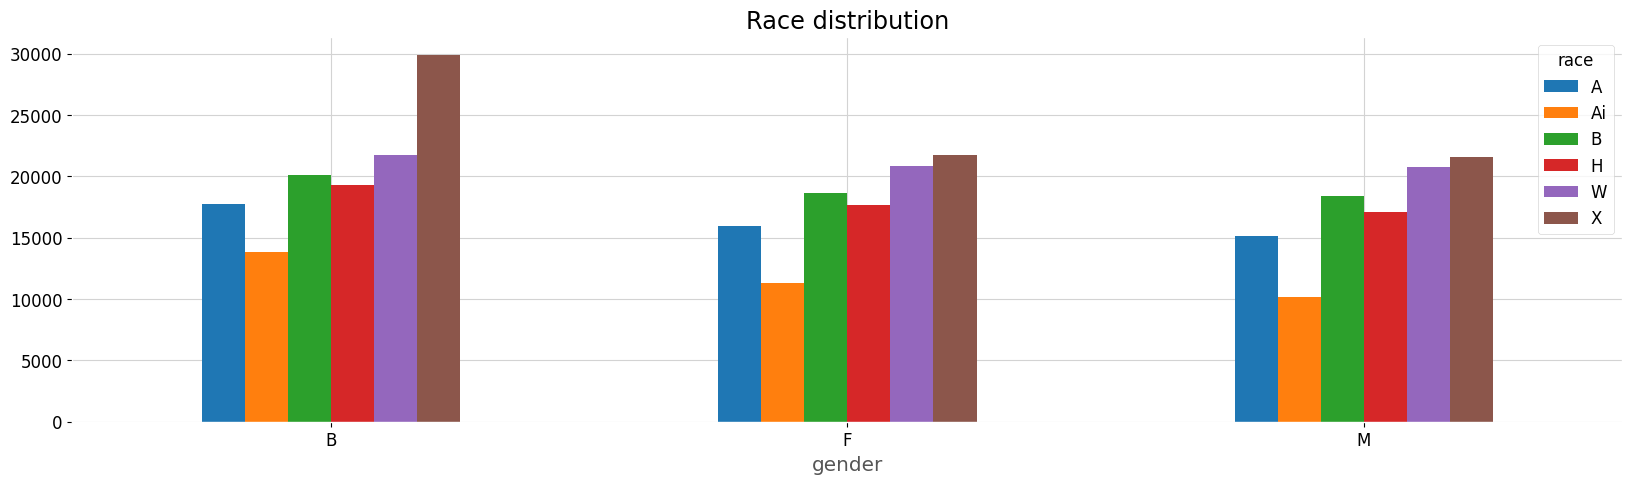

In [ ]:
gender_column = df_clean['race']
df_clean.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution', rot=0)

B: peoples that are not telling there gender

F: Females

M: Males

---

Races explonation:
- A: Asian
- Ai: American Indian
- B: Black
- H: Hispanic
- W: White
- X: All students

### plots of all the overall gender during the years

<AxesSubplot:title={'center':'Race distribution - male'}, xlabel='gender'>

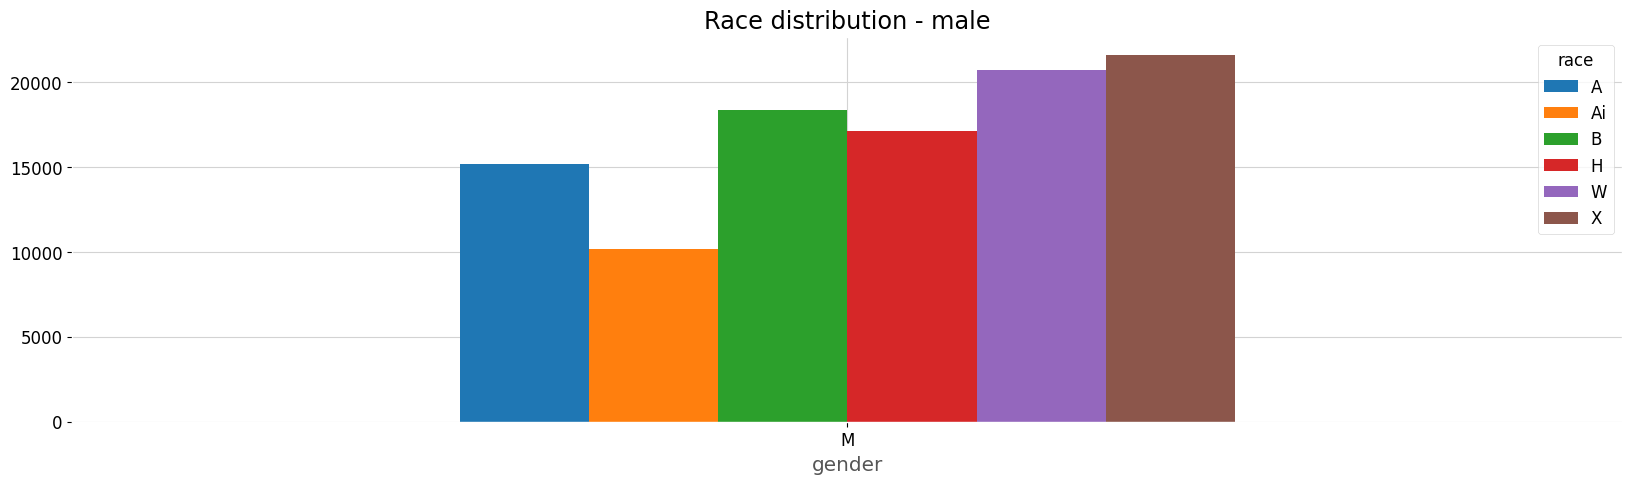

In [ ]:
gender_column = df_clean_m['race']
df_clean_m.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution - male', rot=0)

### Comparing gender and race for year 2011

<AxesSubplot:title={'center':'Race distribution'}, xlabel='gender'>

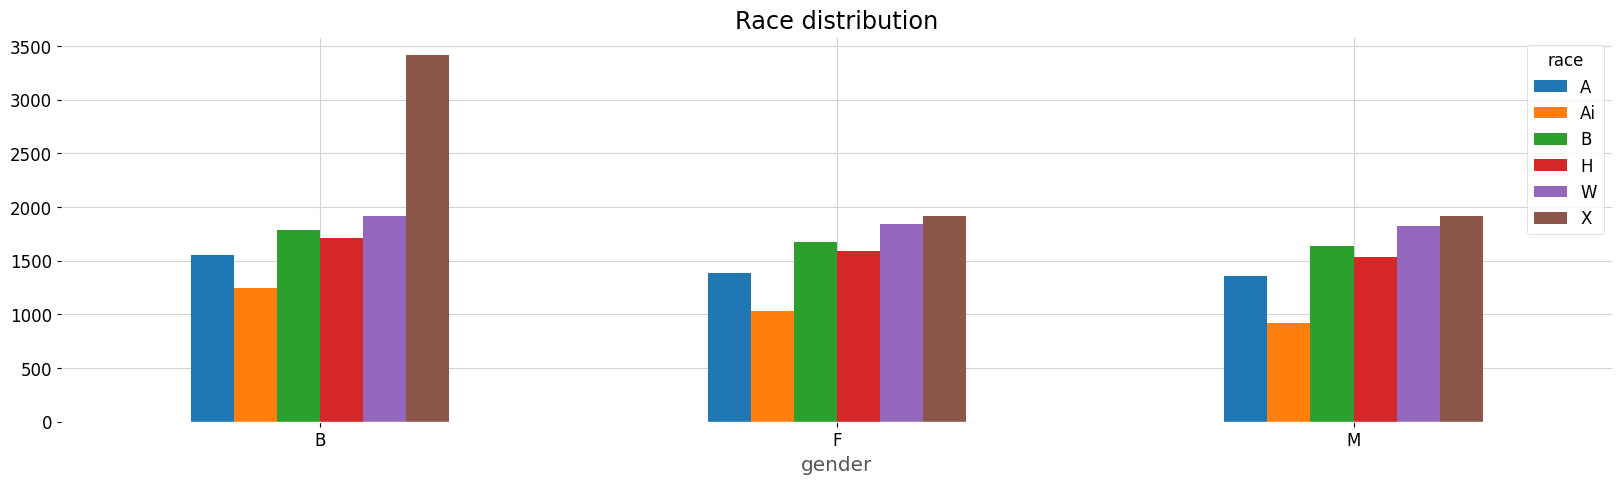

In [ ]:
gender_column = df_2011['race']
df_2011.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution', rot=0)

<AxesSubplot:title={'center':'Race distribution - female'}, xlabel='gender'>

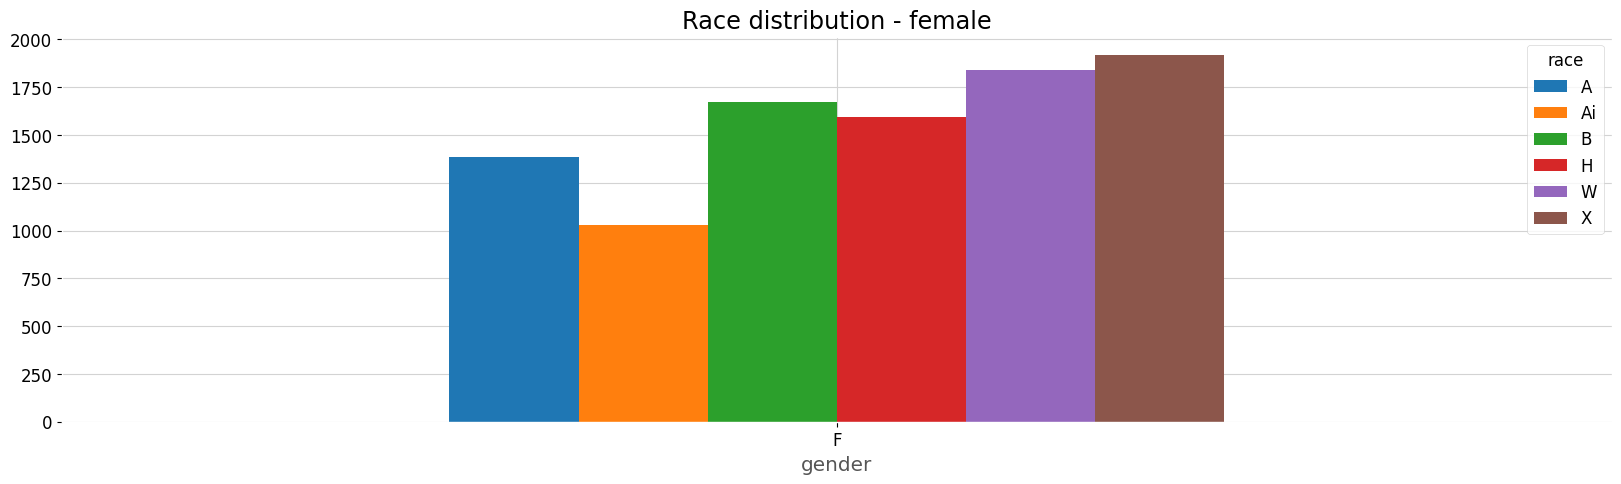

In [ ]:
gender_column = df_2011_f['race']
df_2011_f.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution - female', rot=0)

<AxesSubplot:title={'center':'Race distribution - male'}, xlabel='gender'>

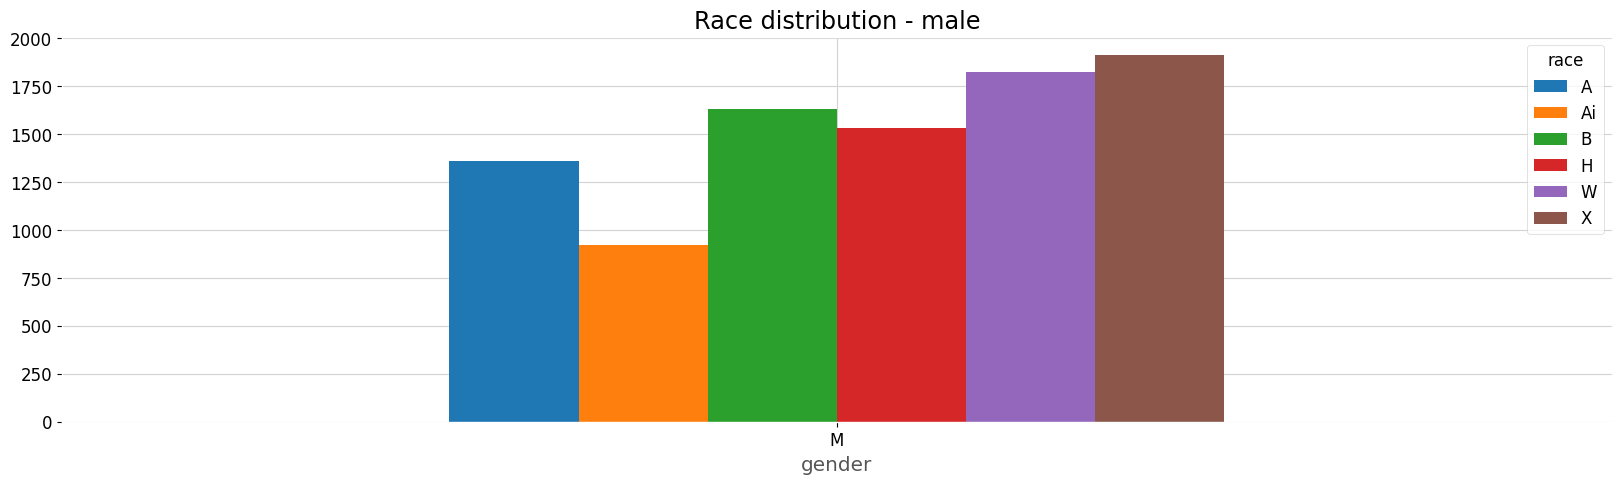

In [ ]:
gender_column = df_2011_m['race']
df_2011_m.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution - male', rot=0)